<a href="https://colab.research.google.com/github/vietdai-bk/machine_learning_course/blob/main/RegressionModels_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression, Gradient Descent và Overfitting

## 1. Hồi quy tuyến tính (Linear Regression)

Hồi quy tuyến tính là một phương pháp thống kê và học máy dùng để mô hình hóa mối quan hệ giữa một biến phụ thuộc (dependent variable) $y$ và một hoặc nhiều biến độc lập (independent variables) $x$. Mục tiêu là tìm một đường thẳng (hoặc mặt phẳng trong không gian nhiều chiều) sao cho khoảng cách giữa các điểm dữ liệu thực tế và đường dự đoán là nhỏ nhất.

### Công thức

**Công thức hồi quy tuyến tính đơn:**
$$y = w_0 + w_1x$$
- $y$: Giá trị dự đoán (biến phụ thuộc).
- $x$: Biến độc lập.
- $w_0$: Hệ số chặn (intercept), hay còn gọi là bias.
- $w_1$: Hệ số góc (slope), còn gọi là weight.

**Công thức hồi quy tuyến tính đa biến:**
$$y = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n$$

**Dạng vector:**
$$y = \mathbf{w}^T \mathbf{x} + w_0$$
- $\mathbf{w} = [w_1, w_2, \dots, w_n]$: Vector trọng số.
- $\mathbf{x} = [x_1, x_2, \dots, x_n]$: Vector biến độc lập.

### Hàm mất mát (Loss Function)

Để đo lường sai số giữa giá trị dự đoán $\hat{y}$ và giá trị thực tế $y$, ta thường dùng hàm mất mát bình phương trung bình (Mean Squared Error - MSE):
$$MSE = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i)^2$$
- $m$: Số lượng mẫu dữ liệu.
- $\hat{y}_i = \mathbf{w}^T \mathbf{x}_i + w_0$: Giá trị dự đoán cho mẫu $i$.
- $y_i$: Giá trị thực tế của mẫu $i$.

Mục tiêu là tối thiểu hóa $J(\mathbf{w})$ bằng cách tìm $\mathbf{w}$ và $w_0$ tối ưu.

---

## 2. Gradient Descent (Hạ Gradient)

Gradient Descent là một thuật toán tối ưu hóa dùng để tìm các tham số $\mathbf{w}$ sao cho hàm mất mát $J(\mathbf{w})$ đạt giá trị nhỏ nhất. Ý tưởng là di chuyển ngược chiều với gradient của hàm mất mát để tiến gần đến điểm tối ưu.

### Công thức cập nhật trọng số

Trong mỗi bước lặp, các tham số được cập nhật theo quy tắc:
$$w_j := w_j - \alpha \frac{\partial J(\mathbf{w})}{\partial w_j}$$
- $\alpha$: Tốc độ học (learning rate), một hằng số nhỏ quyết định bước di chuyển.
- $\frac{\partial J(\mathbf{w})}{\partial w_j}$: Đạo hàm riêng của hàm mất mát theo $w_j$.

Với hàm mất mát MSE, đạo hàm riêng được tính như sau:
- Đối với $w_0$ (hệ số chặn):
$$\frac{\partial J}{\partial w_0} = \frac{2}{m} \sum_{i=1}^m (\hat{y}_i - y_i)$$
- Đối với $w_j$ (các trọng số khác):
$$\frac{\partial J}{\partial w_j} = \frac{2}{m} \sum_{i=1}^m (\hat{y}_i - y_i) x_{ij}$$

### Quy trình Gradient Descent

1. Khởi tạo $\mathbf{w}$ và $w_0$ ngẫu nhiên (thường gần 0).
2. Tính gradient của $J(\mathbf{w})$.
3. Cập nhật $\mathbf{w}$ và $w_0$ theo công thức trên.
4. Lặp lại cho đến khi $J(\mathbf{w})$ hội tụ hoặc đạt số lần lặp tối đa.

### Các biến thể

- **Batch Gradient Descent**: Dùng toàn bộ dữ liệu để tính gradient trong mỗi bước.
- **Stochastic Gradient Descent (SGD)**: Chỉ dùng một mẫu dữ liệu ngẫu nhiên mỗi lần cập nhật.
- **Mini-batch Gradient Descent**: Dùng một nhóm nhỏ mẫu dữ liệu.

---

## 3. Overfitting (Quá khớp)

Overfitting xảy ra khi mô hình học máy (như hồi quy tuyến tính) học quá chi tiết các đặc điểm của dữ liệu huấn luyện, bao gồm cả nhiễu (noise), dẫn đến việc dự đoán kém trên dữ liệu mới (dữ liệu kiểm tra). Trong hồi quy tuyến tính, điều này thường xảy ra khi mô hình quá phức tạp (nhiều biến độc lập hoặc bậc đa thức cao).

### Dấu hiệu của Overfitting

- Sai số trên tập huấn luyện rất nhỏ, nhưng sai số trên tập kiểm tra rất lớn.
- Mô hình có các hệ số $w_j$ với giá trị cực lớn (do cố gắng khớp mọi điểm dữ liệu).

### Cách khắc phục

1. **Regularization (Điều chuẩn)**:
   - Thêm một thành phần phạt vào hàm mất mát để kiểm soát độ lớn của $\mathbf{w}$.
   - **Ridge Regression (L2 regularization):**
   $$J(\mathbf{w}) = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i)^2 + \lambda \sum_{j=1}^n w_j^2$$
   - **Lasso Regression (L1 regularization):**
   $$J(\mathbf{w}) = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i)^2 + \lambda \sum_{j=1}^n |w_j|$$
   - $\lambda$: Hằng số điều chỉnh mức độ phạt.

2. **Thu thập thêm dữ liệu**: Giảm nhiễu bằng cách tăng kích thước tập huấn luyện.
3. **Giảm độ phức tạp mô hình**: Loại bỏ các biến không cần thiết hoặc giảm bậc đa thức.
4. **Cross-validation**: Dùng kỹ thuật như k-fold cross-validation để đánh giá hiệu quả mô hình trên nhiều tập dữ liệu khác nhau.

## 4. Đánh giá mô hình Linear Regression

Để đánh giá mô hình hồi quy tuyến tính sau khi huấn luyện, ta sử dụng các độ đo hiệu suất và phân tích residuals.

### Các độ đo hiệu suất

#### a. Mean Squared Error (MSE)
$$MSE = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2$$
- Đo lường trung bình bình phương sai số. Giá trị nhỏ hơn là tốt hơn.

#### b. Root Mean Squared Error (RMSE)
$$RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2}$$
- Căn bậc hai của MSE, cùng đơn vị với biến mục tiêu.

#### c. Mean Absolute Error (MAE)
$$MAE = \frac{1}{m} \sum_{i=1}^m |y_i - \hat{y}_i|$$
- Trung bình giá trị tuyệt đối sai số, ít nhạy với outliers.

#### d. R-squared ($R^2$) - Hệ số xác định
$$R^2 = 1 - \frac{\sum_{i=1}^m (y_i - \hat{y}_i)^2}{\sum_{i=1}^m (y_i - \bar{y})^2}$$
- $y_i$: Giá trị thực tế.
- $\hat{y}_i$: Giá trị dự đoán.
- $\bar{y}$: Trung bình của $y$ thực tế.
- $R^2 = 1$: Mô hình giải thích hoàn toàn dữ liệu.
- $R^2 = 0$: Mô hình không tốt hơn dự đoán trung bình.

### Phân tích Overfitting/Underfitting
- So sánh MSE hoặc $R^2$ trên tập train và test:
  - Train tốt, test kém → Overfitting.
  - Cả train và test đều kém → Underfitting.

### Phân tích Residuals
- Residuals: $e_i = y_i - \hat{y}_i$.
- Vẽ scatter plot residuals so với $\hat{y}$:
  - Phân bố ngẫu nhiên quanh 0 → Mô hình tốt.
  - Có xu hướng → Mô hình chưa đủ tốt.

---

### Tóm tắt

- **Hồi quy tuyến tính**: Dự đoán $y$ bằng tổ hợp tuyến tính của $\mathbf{x}$, tối ưu hóa hàm mất mát MSE.
- **Gradient Descent**: Thuật toán lặp để tìm $\mathbf{w}$ tối ưu, dựa trên gradient của hàm mất mát.
- **Overfitting**: Mô hình quá khớp với dữ liệu huấn luyện, giải quyết bằng regularization, thêm dữ liệu, hoặc đơn giản hóa mô hình.

**Cre: Grok**

# Cài đặt thuật toán Linear Regression

***Sử dụng R2 Score để xem xét mô hình có tốt không:***
$$R^2 = 1 - \frac{\sum_{i=1}^m (y_i - \hat{y}_i)^2}{\sum_{i=1}^m (y_i - \bar{y})^2}$$


In [30]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

price_house = datasets.fetch_california_housing()
x = price_house.data
y = price_house.target

scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

def MSE(y_true, y_pred):
  return np.mean((y_true-y_pred)**2)
def gradient_descent(x, y, lr=0.01, epochs=1000):
  m, n = x.shape
  w = np.zeros(n)
  b = 0
  loss_cost_list = []
  for _ in range(epochs):
    y_pred = np.dot(x, w) + b ## np.dot: tích vô hướng giữa 2 vector w và x
    cost = MSE(y, y_pred)
    loss_cost_list.append(cost)
    w_grad = (2/m) * np.dot(x.T, (y_pred - y)) ## x.T kích thước nxm có thể nhân với y_pred-y kích thước mx1
    b_grad = (2/m) * np.sum(y_pred - y)
    w -= lr * w_grad
    b -= lr * b_grad
  return w, b, loss_cost_list

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
r2score = r2_score(y_test, y_pred)
print(r2score)

w, b, loss_cost_list = gradient_descent(x_train, y_train, lr=0.01, epochs=1000)
print(w, b)
r2score = r2_score(y_test, np.dot(x_test, w) + b)
print(r2score)

0.575787706032451
[ 0.8580605   0.1501549  -0.25253771  0.28100715  0.00710958 -0.04344213
 -0.68321834 -0.65415242] 2.0719469338916703
0.5767889905063643


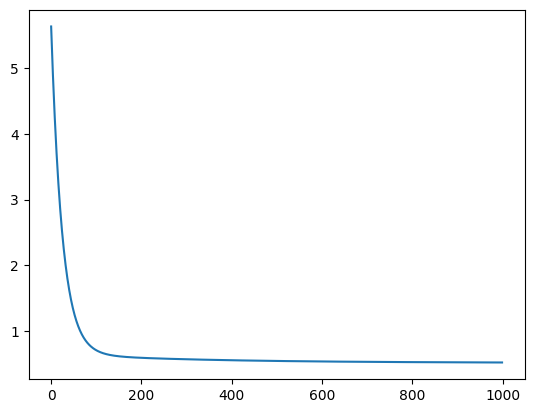

In [31]:
plt.plot(loss_cost_list)
plt.show()